In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
df = pd.read_csv('master_df_clean.csv')

In [3]:
df.shape

(14306, 15)

In [4]:
df.head(5)

,year,iso,country_or_area,region,continent,number_of_disasters,total_human_affected,temperature,precipitation,cropland,country_area,cropland_pct,variant,population,rice_production_in_tonnes
0,1961,BGD,Bangladesh,Southern Asia,Asia,3.0,11266.0,24.916975,198.28148,8880.0,14846.0,0.598141,Medium,49362.843,9622265.0
1,1961,BLZ,Belize,Central America,Americas,1.0,275.0,25.318518,199.05833,42.0,2297.0,0.018285,Medium,94.703,566.0
2,1961,CAN,Canada,Northern America,Americas,1.0,0.0,-7.946412,34.59439,36695.0,987975.0,0.037142,Medium,18233.964,NaN
3,1961,ETH,Ethiopia,Eastern Africa,Africa,1.0,30.0,22.493770,68.36165,11486.0,122190.0,0.094001,Medium,22671.191,NaN
4,1961,FRA,France,Western Europe,Europe,1.0,21.0,11.384623,65.22725,21405.0,54908.6,0.389830,Medium,46266.981,89171.0


In [5]:
top_list =['CHN']

In [6]:
df_top = df.loc[df['iso'].isin(top_list)]
df_top.head(5)

,year,iso,country_or_area,region,continent,number_of_disasters,total_human_affected,temperature,precipitation,cropland,country_area,cropland_pct,variant,population,rice_production_in_tonnes
73,1964,CHN,China,Eastern Asia,Asia,1.0,686.0,6.094583,49.854490,103800.0,956295.0,0.108544,Medium,708254.597,55361000.0
114,1965,CHN,China,Eastern Asia,Asia,1.0,0.0,6.137480,46.326405,103600.0,956295.0,0.108335,Medium,724218.968,58509240.0
212,1967,CHN,China,Eastern Asia,Asia,1.0,2085.0,5.791807,46.505500,102800.0,956295.0,0.107498,Medium,762581.176,62487900.0
308,1969,CHN,China,Eastern Asia,Asia,2.0,56810.0,5.689573,47.849987,102000.0,956295.0,0.106662,Medium,805985.939,63408360.0
365,1970,CHN,China,Eastern Asia,Asia,2.0,24107.0,5.920915,49.908665,101600.0,956295.0,0.106243,Medium,827601.394,73363330.0


In [7]:
df_top.shape

(59, 15)

In [8]:
col = df_top.columns

In [9]:
# check waht percentage of each column is missing
for c in col:
    print(f" percentage of missing data in {c} is {df_top[c].isna().sum()/df_top.shape[0]*100}.")

 percentage of missing data in year is 0.0.
 percentage of missing data in iso is 0.0.
 percentage of missing data in country_or_area is 0.0.
 percentage of missing data in region is 13.559322033898304.
 percentage of missing data in continent is 13.559322033898304.
 percentage of missing data in number_of_disasters is 0.0.
 percentage of missing data in total_human_affected is 0.0.
 percentage of missing data in temperature is 11.864406779661017.
 percentage of missing data in precipitation is 11.864406779661017.
 percentage of missing data in cropland is 0.0.
 percentage of missing data in country_area is 0.0.
 percentage of missing data in cropland_pct is 0.0.
 percentage of missing data in variant is 0.0.
 percentage of missing data in population is 0.0.
 percentage of missing data in rice_production_in_tonnes is 0.0.


In [10]:
# drop rows with missed temperature and precipitation data (~%12 of the data)
df_top = df_top.dropna(subset=['temperature', 'precipitation'])

In [11]:
df_top.shape

(52, 15)

In [12]:
# creeat a subset of columns as our model's predictors
col_sub = ['number_of_disasters', 'total_human_affected', 'temperature',
       'precipitation', 'cropland']

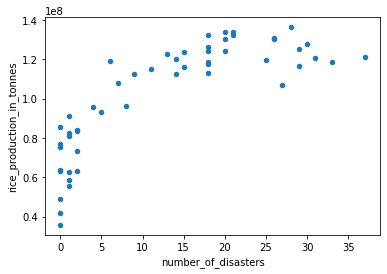

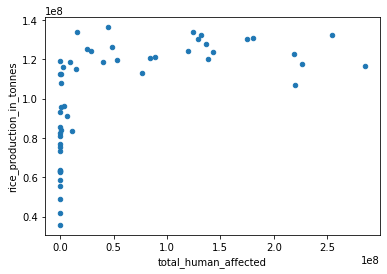

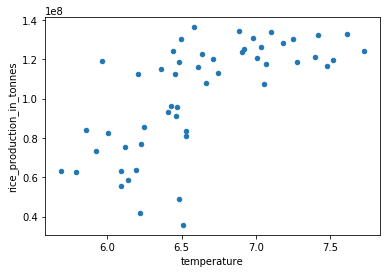

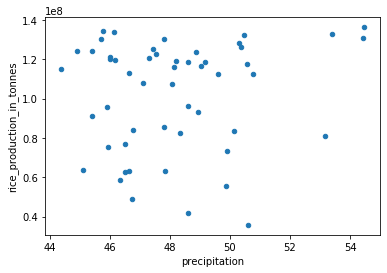

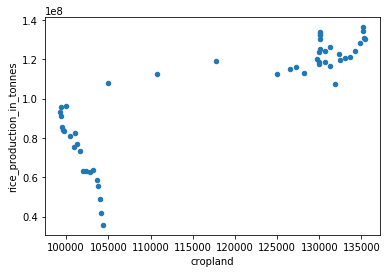

In [13]:
# scatterplots for rice production vs each predictor
for c in col_sub:
    df_top.plot(kind='scatter', x=c, y='rice_production_in_tonnes');

In [14]:
# Extract correlations
corr_matrix = df_top.corr().abs()
print(corr_matrix['rice_production_in_tonnes'].sort_values(ascending=False))

rice_production_in_tonnes    1.000000
population                   0.951535
year                         0.916261
cropland                     0.847159
cropland_pct                 0.847159
number_of_disasters          0.811522
temperature                  0.673504
country_area                 0.577919
total_human_affected         0.564507
precipitation                0.116554
Name: rice_production_in_tonnes, dtype: float64


Text(0.5, 1.0, 'precipitation')

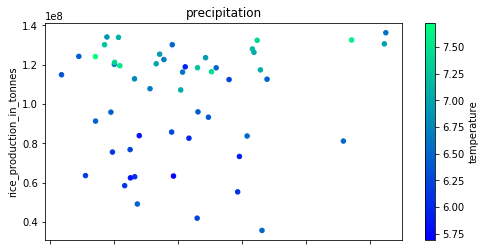

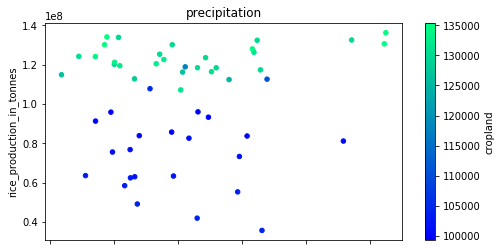

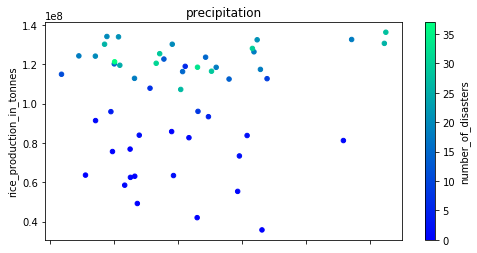

In [15]:
# color scatterplots for rice_production vs precipitation: color represents othe predictors
df_top.plot(kind='scatter', x='precipitation', y='rice_production_in_tonnes', \
        c='temperature', colormap='winter', figsize=(8,4))
plt.title('precipitation')

df_top.plot(kind='scatter', x='precipitation', y='rice_production_in_tonnes', \
        c='cropland', colormap='winter', figsize=(8,4))
plt.title('precipitation')

df_top.plot(kind='scatter', x='precipitation', y='rice_production_in_tonnes', \
        c='number_of_disasters', colormap='winter', figsize=(8,4))
plt.title('precipitation')

Text(0.5, 1.0, 'temperature')

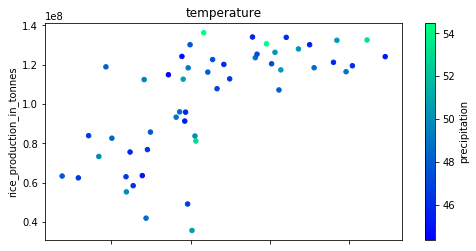

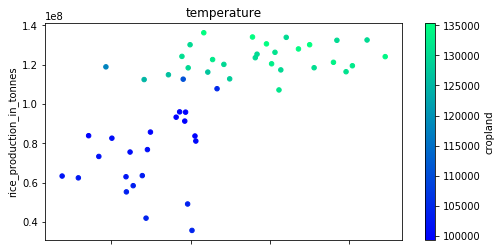

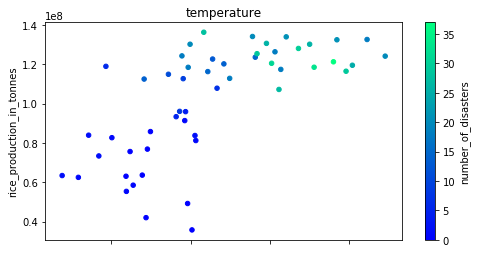

In [16]:
# color scatterplots for rice_production vs temperature: color represents othe predictors
df_top.plot(kind='scatter', x='temperature', y='rice_production_in_tonnes', \
        c='precipitation', colormap='winter', figsize=(8,4))
plt.title('temperature')

df_top.plot(kind='scatter', x='temperature', y='rice_production_in_tonnes', \
        c='cropland', colormap='winter', figsize=(8,4))
plt.title('temperature')

df_top.plot(kind='scatter', x='temperature', y='rice_production_in_tonnes', \
        c='number_of_disasters', colormap='winter', figsize=(8,4))
plt.title('temperature')

In [17]:
# Predictors
X = df_top[['number_of_disasters', 'total_human_affected', 'temperature',
       'precipitation', 'cropland']].to_numpy()

# Response
Y = df_top['rice_production_in_tonnes'].to_numpy()

# linear regression model
reg = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
reg.fit(X, Y)
Y_predicted = reg.predict(X)

# R-squared Value
print('coefficient of determination:', reg.score(X, Y))

# Print coefficients
print('coefficients:', reg.coef_) 

coefficient of determination: 0.730240885045064
coefficients: [ 4.95545523e+05 -1.44604564e-02  3.07140008e+06  3.47527212e+05
  1.22966237e+03]


Text(0, 0.5, 'rice production (tonnes): actual-predicted')

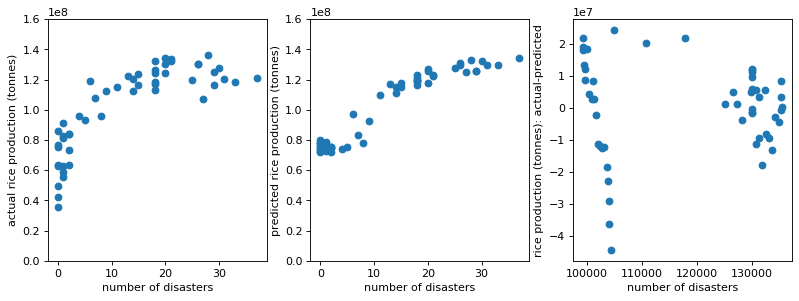

In [18]:
# scatterplots for actual and predicted/modeled rice_productin and their difference (error) vs number_of_disasters
from matplotlib.pyplot import figure
figure(figsize=(12, 4), dpi=80)

plt.subplot(1, 3, 1)
plt.scatter(X[:,0],Y);
plt.ylim(0,1.6e8)
plt.xlabel('number of disasters')
plt.ylabel('actual rice production (tonnes)')

plt.subplot(1, 3, 2)
plt.scatter(X[:,0],Y_predicted);
plt.ylim(0,1.6e8)
plt.xlabel('number of disasters')
plt.ylabel('predicted rice production (tonnes)')

plt.subplot(1, 3, 3)
plt.scatter(X[:,4],Y - Y_predicted);
plt.xlabel('number of disasters')
plt.ylabel('rice production (tonnes): actual-predicted')

Text(0, 0.5, 'rice production (tonnes): actual-predicted')

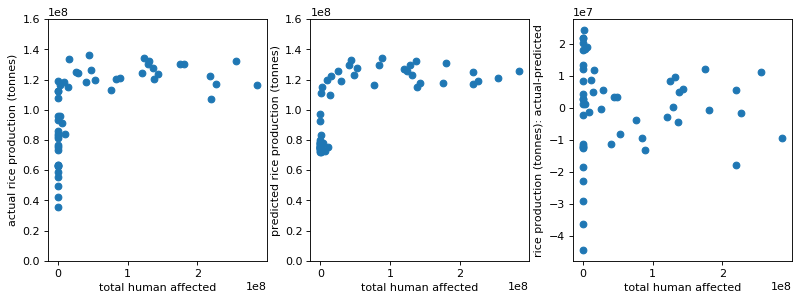

In [19]:
# scatterplots for actual and predicted/modeled rice_productin and their difference (error) vs total_human_affected
from matplotlib.pyplot import figure
figure(figsize=(12, 4), dpi=80)

plt.subplot(1, 3, 1)
plt.scatter(X[:,1],Y);
plt.ylim(0,1.6e8)
plt.xlabel('total human affected')
plt.ylabel('actual rice production (tonnes)')

plt.subplot(1, 3, 2)
plt.scatter(X[:,1],Y_predicted);
plt.ylim(0,1.6e8)
plt.xlabel('total human affected')
plt.ylabel('predicted rice production (tonnes)')

plt.subplot(1, 3, 3)
plt.scatter(X[:,1],Y - Y_predicted);
plt.xlabel('total human affected')
plt.ylabel('rice production (tonnes): actual-predicted')

Text(0, 0.5, 'rice production (tonnes): actual-predicted')

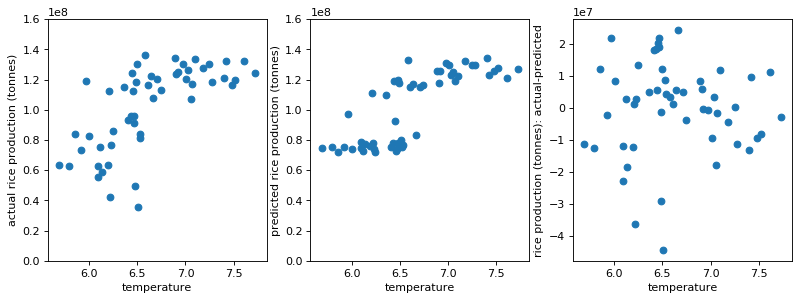

In [20]:
# scatterplots for actual and predicted/modeled rice_productin and their difference (error) vs temperature
from matplotlib.pyplot import figure
figure(figsize=(12, 4), dpi=80)

plt.subplot(1, 3, 1)
plt.scatter(X[:,2],Y);
plt.ylim(0,1.6e8)
plt.xlabel('temperature')
plt.ylabel('actual rice production (tonnes)')

plt.subplot(1, 3, 2)
plt.scatter(X[:,2],Y_predicted);
plt.ylim(0,1.6e8)
plt.xlabel('temperature')
plt.ylabel('predicted rice production (tonnes)')

plt.subplot(1, 3, 3)
plt.scatter(X[:,2],Y - Y_predicted);
plt.xlabel('temperature')
plt.ylabel('rice production (tonnes): actual-predicted')

Text(0, 0.5, 'rice production (tonnes): actual-predicted')

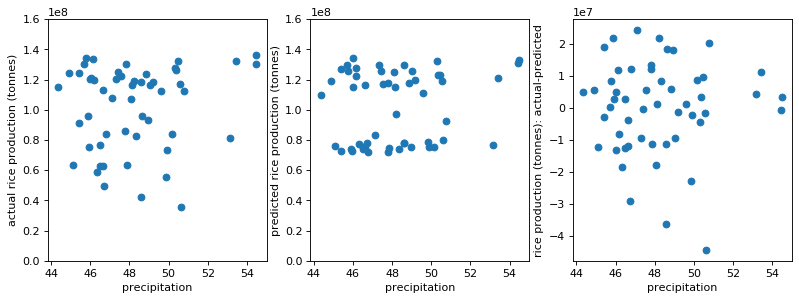

In [21]:
# scatterplots for actual and predicted/modeled rice_productin and their difference (error) vs precipitation
from matplotlib.pyplot import figure
figure(figsize=(12, 4), dpi=80)

plt.subplot(1, 3, 1)
plt.scatter(X[:,3],Y);
plt.ylim(0,1.6e8)
plt.xlabel('precipitation')
plt.ylabel('actual rice production (tonnes)')

plt.subplot(1, 3, 2)
plt.scatter(X[:,3],Y_predicted);
plt.ylim(0,1.6e8)
plt.xlabel('precipitation')
plt.ylabel('predicted rice production (tonnes)')

plt.subplot(1, 3, 3)
plt.scatter(X[:,3],Y - Y_predicted);
plt.xlabel('precipitation')
plt.ylabel('rice production (tonnes): actual-predicted')

Text(0, 0.5, 'rice production (tonnes): actual-predicted')

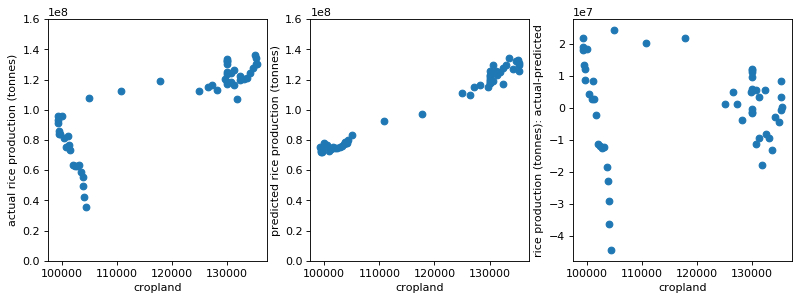

In [22]:
# scatterplots for actual and predicted/modeled rice_productin and their difference (error) vs cropland
from matplotlib.pyplot import figure
figure(figsize=(12, 4), dpi=80)

plt.subplot(1, 3, 1)
plt.scatter(X[:,4],Y);
plt.ylim(0,1.6e8)
plt.xlabel('cropland')
plt.ylabel('actual rice production (tonnes)')

plt.subplot(1, 3, 2)
plt.scatter(X[:,4],Y_predicted);
plt.ylim(0,1.6e8)
plt.xlabel('cropland')
plt.ylabel('predicted rice production (tonnes)')

plt.subplot(1, 3, 3)
plt.scatter(X[:,4],Y - Y_predicted);
plt.xlabel('cropland')
plt.ylabel('rice production (tonnes): actual-predicted')

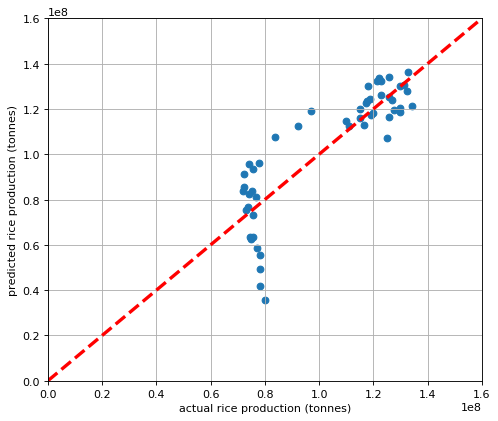

In [25]:
from matplotlib.pyplot import figure
figure(figsize=(7,6), dpi=80)
plt.scatter(Y_predicted,Y);
plt.ylim(0,1.6e8)
plt.xlim(0,1.6e8)
plt.xlabel('actual rice production (tonnes)')
plt.ylabel('predicted rice production (tonnes)')
plt.grid()
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='r', lw=3, scalex=False, scaley=False)

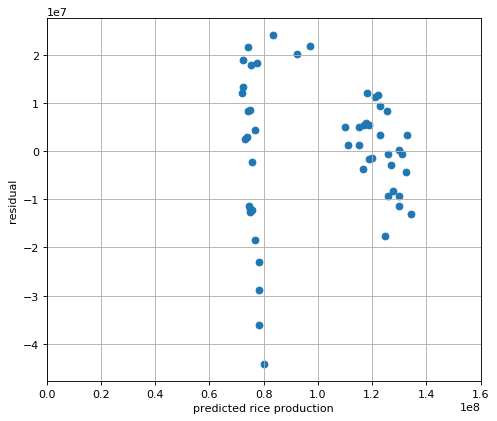

In [24]:
from matplotlib.pyplot import figure
figure(figsize=(7,6), dpi=80)
plt.scatter(Y_predicted,Y - Y_predicted);
plt.xlim(0,1.6e8)
plt.xlabel('predicted rice production')
plt.ylabel('residual')
plt.grid()